## Classification Project

### Load Data

In [29]:
from sklearn.datasets import fetch_openml

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [31]:
mnist = fetch_openml('mnist_784', as_frame = False);

c:\Users\nhatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
X, y = mnist.data, mnist.target

In [33]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

#### Split Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split (X ,y , test_size=0.2, random_state= 42)

In [35]:
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

### SGDClassifier

In [36]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3);
y_pred_3 = sgd_clf.predict(X_test)

#### Evaluate using cross-validation

In [37]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.96930412, 0.96228639, 0.9660345 ])

#### Evaluate using confusion_matrix

In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv =3)
cm = confusion_matrix(y_train_3,y_train_pred)

In [39]:
cm

array([[49726,   566],
       [ 1345,  4363]], dtype=int64)

#### Evaluate using Precision, Recall, F1

In [40]:
precision_score(y_train_3, y_train_pred), recall_score(y_train_3,y_train_pred)


(0.8851694055589369, 0.7643658023826209)

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.8203440819780013

#### Evaluate using accuracy score

In [42]:
accuracy_score(y_test_3, y_pred_3)

0.9382142857142857

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv =3, method = 'decision_function')

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3,y_scores)

#### Plot Precision and Recall

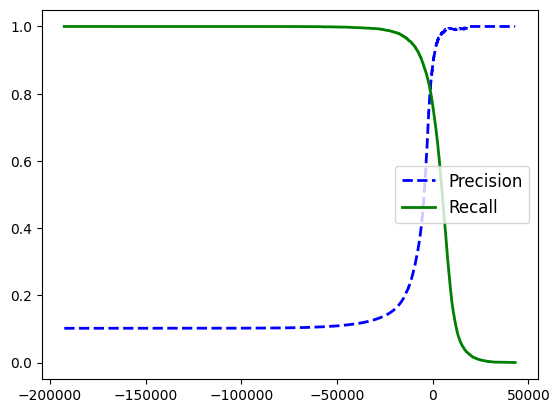

In [45]:
plt.plot(thresholds, precisions[:-1], 'b--',label='Precision', linewidth = 2);
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall', linewidth = 2);
plt.legend(loc = 'center right', fontsize = 12);

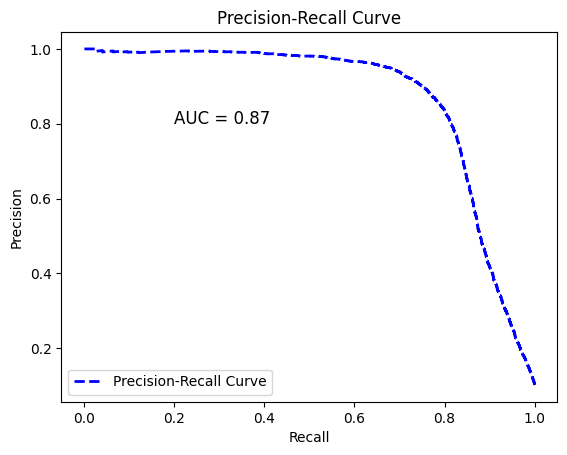

In [46]:
auc_score = auc(recalls, precisions)

plt.plot(recalls, precisions, 'b--', label='Precision-Recall Curve', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.text(0.2, 0.8, f'AUC = {auc_score:.2f}', fontsize=12)
plt.show()

### Random Forest

In [47]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_3);
y_pred_3 = rf_clf.predict(X_test)

#### Evaluate using Cross-validation Score

In [48]:
cross_val_score(rf_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.98226817, 0.98291102, 0.98339226])

#### Evaluate using Confusion Matrix

In [49]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train_3, cv =3)
cm = confusion_matrix(y_train_3,y_train_pred)
cm

array([[50262,    30],
       [  930,  4778]], dtype=int64)

#### Evaluate using Recall, Precision and F1

In [50]:
precision_score(y_train_3, y_train_pred), recall_score(y_train_3,y_train_pred)

(0.9937603993344426, 0.8370707778556412)

In [51]:
f1_score(y_train_3, y_train_pred)

0.9087105363255991

#### Evaluate using accuracy score

In [52]:
accuracy_score(y_test_3, y_pred_3)

0.985

#### Plot Precision and Recall

In [53]:
y_scores = cross_val_predict(rf_clf, X_train, y_train_3, cv =3, method = 'predict_proba')[:,1]

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3,y_scores)

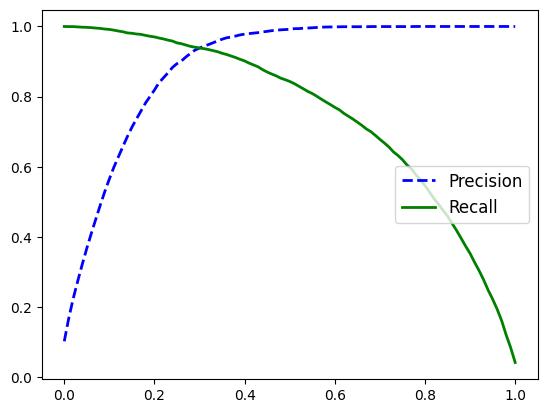

In [55]:
plt.plot(thresholds, precisions[:-1], 'b--',label='Precision', linewidth = 2);
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall', linewidth = 2);
plt.legend(loc = 'center right', fontsize = 12);

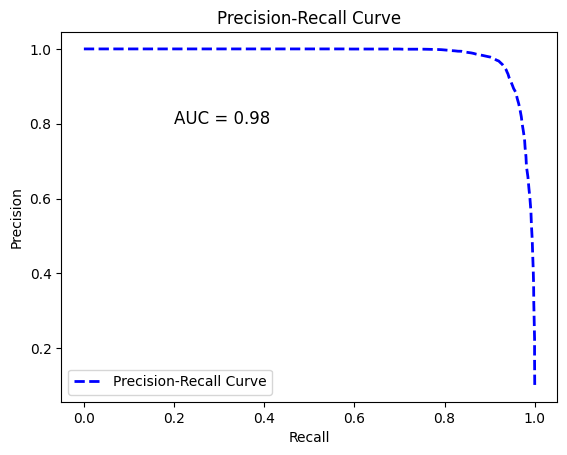

In [56]:
auc_score = auc(recalls, precisions)


plt.plot(recalls, precisions, 'b--', label='Precision-Recall Curve', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.text(0.2, 0.8, f'AUC = {auc_score:.2f}', fontsize=12)
plt.show()

### Support Vector Classifier

In [57]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train_3);
y_pred_3 = svc_clf.predict(X_test)

#### Evaluate using Cross-validation Score

In [58]:
cross_val_score(svc_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.99239299, 0.99250013, 0.99341048])

#### Evaluate using Confusion Matrix

In [59]:
y_train_pred = cross_val_predict(svc_clf, X_train, y_train_3, cv =3)
cm = confusion_matrix(y_train_3,y_train_pred)
cm

array([[50225,    67],
       [  338,  5370]], dtype=int64)

#### Evaluate using Recall, Precision and F1

In [60]:
precision_score(y_train_3, y_train_pred), recall_score(y_train_3,y_train_pred)

(0.9876770277726687, 0.9407848633496847)

In [61]:
f1_score(y_train_3, y_train_pred)

0.9636608344549125

#### Evaluate using accuracy score


In [62]:
accuracy_score(y_test_3, y_pred_3)

0.9932857142857143

In [63]:
y_scores = cross_val_predict(svc_clf, X_train, y_train_3, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_3,y_scores)

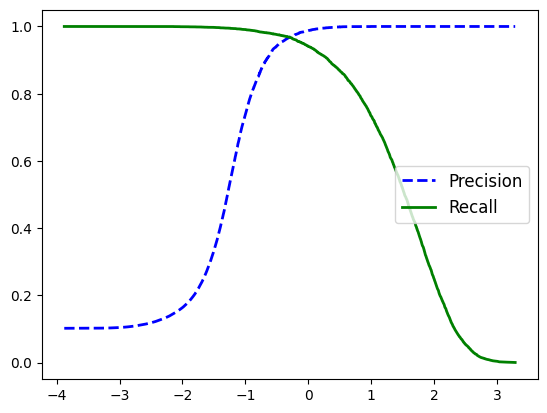

In [64]:
plt.plot(thresholds, precisions[:-1], 'b--',label='Precision', linewidth = 2);
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall', linewidth = 2);
plt.legend(loc = 'center right', fontsize = 12);

In [65]:
auc_score = auc(recalls, precisions)

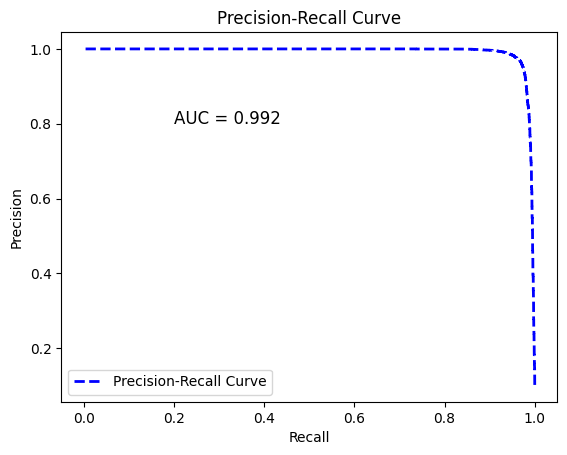

In [66]:
plt.plot(recalls, precisions, 'b--', label='Precision-Recall Curve', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Plot the AUC score
plt.text(0.2, 0.8, f'AUC = {auc_score:.3f}', fontsize=12)
plt.show()

## Thank you reading the whole notebook, if something is wrong, please give me constructive feedbacks

## THE END